In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [115]:
# Read in data 
income_brackets2015 = pd.read_csv("./datasets/income_bracket_wa copy_cleaned.csv")
print(list(income_brackets2015))
# income_brackets2015

['ZIP\rcode [1]', 'Size of adjusted gross income', 'Number of returns', 'Number of single returns', 'Number of joint returns', 'Number of head of household returns', "Number with paid preparer's signature", 'Number of exemptions', 'Number of dependents', 'Number of volunteer prepared returns [2]', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Number of refund anticipation loan returns', 'Number of refund anticipation check returns', 'Number of elderly returns [3]', 'Adjusted gross income (AGI) [4]', 'Total income', 'Unnamed: 18', 'Salaries and wages in AGI', 'Unnamed: 20', 'Taxable interest', 'Unnamed: 22', 'Ordinary dividends', 'Unnamed: 24', 'Qualified dividends [5]', 'Unnamed: 26', 'State and local income tax refunds\r', 'Unnamed: 28', 'Business or profession\rnet income (less loss)', 'Unnamed: 30', 'Net capital gain (less loss) in AGI', 'Unnamed: 32', 'Taxable individual retirement\rarrangement distributions', 'Unnamed: 34', 'Pensions and annuities in AGI', 'Unnamed: 36', 'Number o

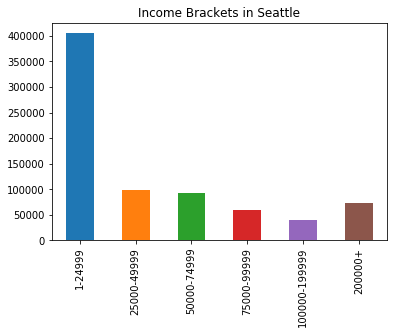

In [117]:
# Transform into two dimensional table
income_brackets2015 = income_brackets2015.rename(columns={'ZIP\rcode [1]': 'zip_code', 
                                                          'Size of adjusted gross income': 'income', 
                                                          'Number of returns': 'returns'})
# income_brackets2015


# seattle_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 
#                 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 
#                 98124, 98125, 98126, 98127, 98129, 98131, 98132, 98133, 98134, 98136, 
#                 98138, 98139, 98141, 98144, 98145, 98146, 98148, 98151, 98154, 98155, 
#                 98158, 98160, 98161, 98164, 98165, 98166, 98168, 98170, 98171, 98174, 
#                 98175, 98177, 98178, 98181, 98184, 98185, 98188, 98189, 98190, 98191, 
#                 98194, 98195, 98198, 98199, 98110]
seattle_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 
         98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 
         98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199]
seattle_income_brackets = income_brackets2015[income_brackets2015["zip_code"].isin(seattle_zips)]
# print(seattle_income_brackets)

# # want 
# # zip_code | 1 - 24999 | 25000 ....
# # 99999      number

# LITERAL GARBAGE USER BEWARE
from collections import defaultdict
import math
zips = defaultdict(list)
zips_df = d = {'zip_code': [], '1-24999': [], '25000-49999': [], '50000-74999': [], '75000-99999': [], '100000-199999': [], '200000+': [] }
# for index, row in seattle_income_brackets.iterrows():
row_iterator = seattle_income_brackets.iterrows()
for i, row in row_iterator:
    if row['income'] is not 'nan':
        if row['returns'] == "**":
            zips[row['zip_code']].append(0)
        else:
            zips[int(row['zip_code'])].append(row['returns'].replace(',', ''))
for k, v in zips.items():
#     print(k,v)
    zips_df['zip_code'].append(k)
    zips_df['1-24999'].append(int(v[0]))
    zips_df['25000-49999'].append(int(v[1]))
    zips_df['50000-74999'].append(int(v[2]))
    zips_df['75000-99999'].append(int(v[3]))
    zips_df['100000-199999'].append(int(v[4]))
    zips_df['200000+'].append(int(v[5]))
    
df = pd.DataFrame(data=zips_df)
sum_bracket = df.sum(axis=0)
sum_bracket = sum_bracket.drop(['zip_code'])
new_index= ['1-24999', '25000-49999', '50000-74999', '75000-99999','100000-199999', '200000+']
sum_bracket = sum_bracket.reindex(new_index)
# sum_bracket
sum_bracket.plot(kind='bar')
plt.title("Income Brackets in Seattle")
plt.show()
    

In [24]:
# Kyle does some crazy shit.
income_brackets2015 = pd.read_csv("./datasets/income_bracket_wa copy_cleaned.csv")
income_brackets2015 = income_brackets2015.rename(columns={'ZIP\rcode [1]': 'zip_code', 
                                                          'Total income': 'returns', 
                                                          'Unnamed: 18': 'total_income'})
seattle_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 
         98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 
         98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199]
seattle_income_brackets = income_brackets2015[income_brackets2015["zip_code"].isin(seattle_zips)]
row_iterator = seattle_income_brackets.iterrows()
for i, row in row_iterator:
    if (i % 8 == 1):
        total_income = int(row["total_income"].replace(',', ''))
        returns = int(row["returns"].replace(',', ''))
        
        average_income_per_return = total_income / returns
        print(str(row["zip_code"]) + " has average return of " + str(average_income_per_return))
seattle_income_brackets

print("kyle is sexy af and his data science skills are passable")

98101.0 has average return of 182.79722891566266
98102.0 has average return of 118.63175270108043
98103.0 has average return of 99.41001697792869
98104.0 has average return of 110.3875730994152
98105.0 has average return of 154.41700236966824
98106.0 has average return of 57.324786324786324
98107.0 has average return of 92.73978629792583
98108.0 has average return of 54.83138866064092
98109.0 has average return of 128.3457382953181
98112.0 has average return of 249.7257698541329
98115.0 has average return of 120.2459041147603
98116.0 has average return of 114.45964063579821
98117.0 has average return of 112.08305462653288
98118.0 has average return of 64.83236425823002
98119.0 has average return of 132.56860198624904
98121.0 has average return of 163.35692007797272
98122.0 has average return of 90.72025198320112
98125.0 has average return of 72.07039132484677
98126.0 has average return of 83.03312555654497
98133.0 has average return of 62.97366733466934
98134.0 has average return of 18

,zip_code,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Number of volunteer prepared returns [2],...,Total tax liability [10],Unnamed: 120,Additional Medicare tax,Unnamed: 122,Net investment income tax,Unnamed: 124,Tax due at time of filing [11],Unnamed: 126,Overpayments refunded [12],Unnamed: 128
425,98101.0,NaN,"8,300","6,110","1,780",250,"3,160","10,910","1,010",250,...,"7,460","324,201",750,"1,620",860,"8,403","2,270","20,584","5,300","34,856"
426,98101.0,"$1 under $25,000",1570,1390,80,70,450,1630,140,160,...,870,905,0,0,0,0,200,201,1140,1404
427,98101.0,"$25,000 under $50,000",1650,1450,110,60,440,1920,170,70,...,1580,5379,0,0,0,0,320,597,1270,2166
428,98101.0,"$50,000 under $75,000",1140,940,140,40,370,1400,130,20,...,1110,8738,0,0,0,0,300,740,780,1818
429,98101.0,"$75,000 under $100,000",800,600,150,20,310,1020,70,**,...,790,10195,**,**,0,0,210,677,550,1676
430,98101.0,"$100,000 under $200,000",1920,1270,590,30,770,2690,180,**,...,1890,47601,50,12,**,**,640,2817,1160,4197
431,98101.0,"$200,000 or more",1220,460,710,30,820,2250,320,0,...,1220,251383,700,1608,860,8403,600,15552,400,23595
433,98102.0,NaN,"16,660","13,200","2,910",360,"4,700","20,890","1,690",220,...,"15,340","385,075","1,010","2,153","1,140","11,502","4,420","42,494","11,350","32,936"
434,98102.0,"$1 under $25,000",3010,2820,100,60,680,2910,100,110,...,1840,1983,0,0,0,0,450,445,2300,2589
435,98102.0,"$25,000 under $50,000",4190,3900,170,70,730,4490,160,110,...,4100,14802,0,0,0,0,870,1395,3240,4653


1